#CMPE 258 HW3 - Part A
Numpy to build neural network of 3d input, 2d output

Abhishek Bais

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generate 3d input, 2d output

In [6]:
# Generate 3-d input, 2d output
n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

# y = 5x^2 + wx + b
weights_true = np.array([[3, 2, -1], [2, 3, 1]]).T
bias_true = np.array([[0.5], [0.5]]).T
print(x.shape, weights_true.shape, bias_true.shape)

y_true = (5 * x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

print('x is: ' + str(x[:2]))
print('y is: ' + str(y_true[:2]))

(100, 3) (3, 2) (1, 2)
x: (100, 3), weights: (3, 2), bias: (1, 2), y: (100, 2)
x is: [[ 0.74582562 -0.47426085 -0.01760857]
 [ 0.57168851  0.31763141  0.58569595]]
y is: [[12.39808492  9.4892194 ]
 [ 6.4607471   9.67878912]]


# Generate a 3d TSNE plot of the data

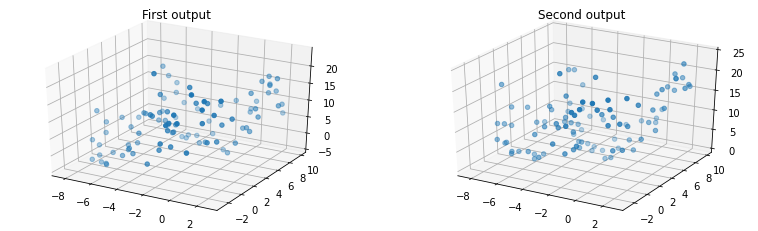

In [7]:
# Generate 3D TSNE plots for both outputs
def plot_3d(X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)
  fig = plt.figure(figsize=plt.figaspect(0.3))
  
  # plot the first output y[:,0]
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,0], label='y_true')
  ax.set_title("First output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,0], label='y_pred', marker='v')
  
  # plot the second output y[:,1]
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y[:,1], label='y_true')
  ax.set_title("Second output")
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred[:,1], label='y_pred', marker='v')
  
plot_3d(x, y_true)

# Define a loss function
MSE

In [71]:
# Loss Function with gradient descent
class MSE:
  def __init__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true

  def loss(self):
    n = self.y_true.shape[0]
    return mean_squared_error(self.y_true, self.y_pred)

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2 * (self.y_pred - self.y_true) / n
    return self.gradient

# Define activation functions
Relu

In [70]:
# RELU non-linear layer class
class Relu:
  def __init__(self):
    self.input_ = np.array([])

  def forward(self, input_):
    self.input_  = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output
    
  def backward(self, out_gradient):
    self.input_gradient = (self.input_ > 0) * out_gradient
    return self.input_gradient
  
  def update(self, lr):
    return

# Define backpropagation for Linear, Relu layers

In [99]:
# Layer class with backpropagation 
# Default activation is linear, pass in activation='Relu' for non-linear
class Layer:
  # Init
  def __init__(self, ni=1, no=1, activation='Linear'):
    self.ni = ni
    self.no = no
    self.activation = 'Linear'

    # Init weights, bias, x
    self.weights = np.random.uniform(-1, 1, (ni, no))
    self.bias = np.random.rand((1))
    self.x = np.zeros([ni])

    # activation
    if activation == 'Relu':
      self.activation = Relu()
  
  # Forward propagate input
  def forward(self, x):
    self.x = x
    self.output = x @ self.weights + self.bias
  
   # Pass output to activation function
    if self.activation != 'Linear':
      return self.activation.forward(self.output)
    else:
      return self.output 

  # Backpropagate gradients
  def backward(self, upstream_gradient):
    gradient = upstream_gradient
    if self.activation != 'Linear':
      gradient = self.activation.backward(gradient)
    
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  # Update weights, bias
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

  # Print the layer params
  def dump(self):
    print('Layer has ni', self.ni)
    print('Layer has no', self.no)
    print('Layer has activation function', self.activation)
    print('Layer has weights', self.weights)
    print('Layer has bias', self.bias)

# Build the nueral net

In [100]:
# Custom Model using nn.Linear modules
class Model:
  # Dump NN
  def dump(self):
    print('Builiding NN:')
    for j, layer in enumerate(self.layers):
      print('---- Layer {} ----'.format(j))
      layer.dump()

  # Init
  def __init__(self, ni=3, nh=[2], no=2, activation='Linear'):
    self.ni = ni
    self.nh = nh
    self.no = no

    # Build a chain of layers to form the NN
    self.layers = []
    self.layers.append(Layer(ni, no, activation='Linear'))
    self.layers.append(Layer(no, 5, activation))
    self.layers.append(Layer(5, 2, activation))
        
  # Dump the model created
    self.dump()
  
  # Forward propagate
  def forward(self, input):
    o = input
    for l in self.layers:
      o = l.forward(o)
    return o

  # Back propagate loss, gradients
  def backward(self, y_pred, y_true):
    mse = MSE(y_pred, y_true)
    print('Loss: ', mse.loss())
    loss_gradient = mse.backward()
    for layer in reversed(self.layers):
      loss_gradient = layer.backward(loss_gradient)

  # Update lr
  def update(self, lr):
    for layer in self.layers:
      layer.update(lr)

  # Train model
  def fit(self, x, y_true, lr, epochs):
    print('Propagating input: ' + str(x[:2]))
    for epoch in range(epochs):
      y_pred = self.forward(x)
      self.backward(y_pred, y_true)
      self.update(lr)

# Train neural net with non-linear relu layer

In [101]:
# Configure hyperparams of model
num_epochs = 40
lr = 0.01
ni = x.shape[1]
no = y_true.shape[1]
nh = [5,3]

In [102]:
nn = Model(ni, nh, no=no, activation='Relu')
nn.fit(x, y_true, lr, num_epochs)
y_pred = nn.forward(x)

mse = MSE(y_true, y_pred)
print('Final Loss is ', mse.loss())

Builiding NN:
---- Layer 0 ----
Layer has ni 3
Layer has no 2
Layer has activation function Linear
Layer has weights [[ 0.16984852  0.50365212]
 [ 0.9357078  -0.81212523]
 [ 0.58195487 -0.4445529 ]]
Layer has bias [0.46364878]
---- Layer 1 ----
Layer has ni 2
Layer has no 5
Layer has activation function <__main__.Relu object at 0x7fa947a34750>
Layer has weights [[ 0.34924209  0.65044994 -0.92820112  0.22533712 -0.51306379]
 [-0.75526844  0.56219545  0.78263341  0.30962356  0.5437084 ]]
Layer has bias [0.34959594]
---- Layer 2 ----
Layer has ni 5
Layer has no 2
Layer has activation function <__main__.Relu object at 0x7fa947a34dd0>
Layer has weights [[ 0.82369572 -0.01710606]
 [ 0.76307213 -0.77664895]
 [ 0.90773666  0.49445246]
 [-0.73213068  0.27935176]
 [-0.49437433  0.46578936]]
Layer has bias [0.35552269]
Propagating input: [[ 0.74582562 -0.47426085 -0.01760857]
 [ 0.57168851  0.31763141  0.58569595]]
Loss:  114.37810065128157
Loss:  105.3265405297247
Loss:  93.26993287641511
Loss: 

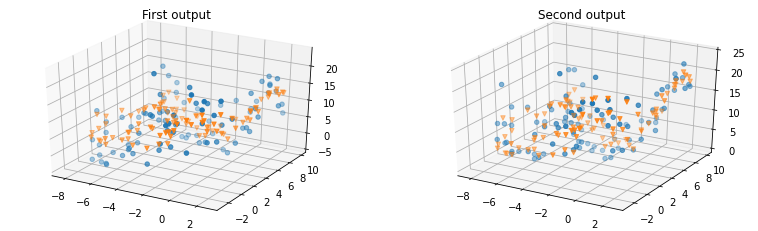

In [103]:
plot_3d(x, y_true, y_pred)

# Train neural net with  only linear layers

In [104]:
nn = Model(ni, nh, no=no, activation='Linear')
nn.fit(x, y_true, lr, num_epochs)
y_pred = nn.forward(x)

mse = MSE(y_true, y_pred)
print('Final Loss is ', mse.loss())

Builiding NN:
---- Layer 0 ----
Layer has ni 3
Layer has no 2
Layer has activation function Linear
Layer has weights [[-0.80884944 -0.97179482]
 [-0.01330728 -0.4552444 ]
 [-0.13139261 -0.30455724]]
Layer has bias [0.91326979]
---- Layer 1 ----
Layer has ni 2
Layer has no 5
Layer has activation function Linear
Layer has weights [[-0.30851012  0.85409153  0.29917563  0.21279658  0.41595468]
 [-0.14436294 -0.7453357   0.3489117  -0.51500159 -0.2694866 ]]
Layer has bias [0.87233787]
---- Layer 2 ----
Layer has ni 5
Layer has no 2
Layer has activation function Linear
Layer has weights [[ 0.52639924 -0.11995745]
 [-0.92206594  0.58840153]
 [-0.54709635  0.49438085]
 [-0.51735385  0.98509737]
 [ 0.99023328 -0.92797542]]
Layer has bias [0.24137352]
Propagating input: [[ 0.74582562 -0.47426085 -0.01760857]
 [ 0.57168851  0.31763141  0.58569595]]
Loss:  121.08601626983281
Loss:  97.3609976574121
Loss:  70.19550096505286
Loss:  46.81283373668157
Loss:  40.73155650768619
Loss:  39.678639338198295

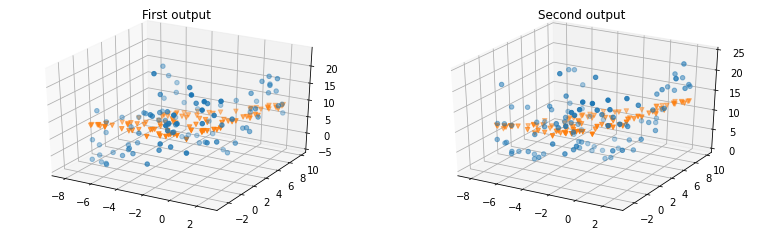

In [105]:
plot_3d(x, y_true, y_pred)